# Perceptron

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def predict(self, x):
        return np.where(np.dot(x, self.weights) >= 0, 1, -1)
    
    def train(self, X, y):
        self.weights = np.random.randn(X.shape[1])
        for _ in range(self.epochs):
            misclassified = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights += update * xi
                misclassified += int(update != 0)
            if misclassified == 0:
                break
        return self.weights
    
    def train_sgd(self, X, y):
        self.weights = np.random.randn(X.shape[1])
        for _ in range(self.epochs):
            for i in np.random.permutation(len(X)):
                xi, target = X[i], y[i]
                update = self.learning_rate * (target - self.predict(xi))
                self.weights += update * xi
        return self.weights
    
    def train_mini_batch_sgd(self, X, y, batch_size=32):
        self.weights = np.random.randn(X.shape[1])
        n_samples = len(X)
        for _ in range(self.epochs):
            indices = np.random.permutation(n_samples)
            for start in range(0, n_samples, batch_size):
                end = start + batch_size
                batch_indices = indices[start:end]
                X_batch, y_batch = X[batch_indices], y[batch_indices]
                
                predictions = self.predict(X_batch)
                updates = self.learning_rate * (y_batch - predictions)
                self.weights += np.dot(X_batch.T, updates)
        return self.weights

In [2]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import time
import matplotlib.pyplot as plt

centers = [[2, 2], [5, 5]]
n_classes = len(centers)
n_samples = 512

np.random.seed(69)

data, labels = make_blobs(n_samples=n_samples, centers=centers, random_state=69)

# Data setup
X = np.stack((np.ones(n_samples), data[:, 0], data[:, 1]), axis=1)
y = np.where(labels == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
x1 = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)


Training time: 3.57 seconds
Accuracy: 0.98
Training time: 3.55 seconds
Accuracy SGD: 0.98
Training time: 0.18 seconds
Accuracy Mini-batch SGD: 0.99


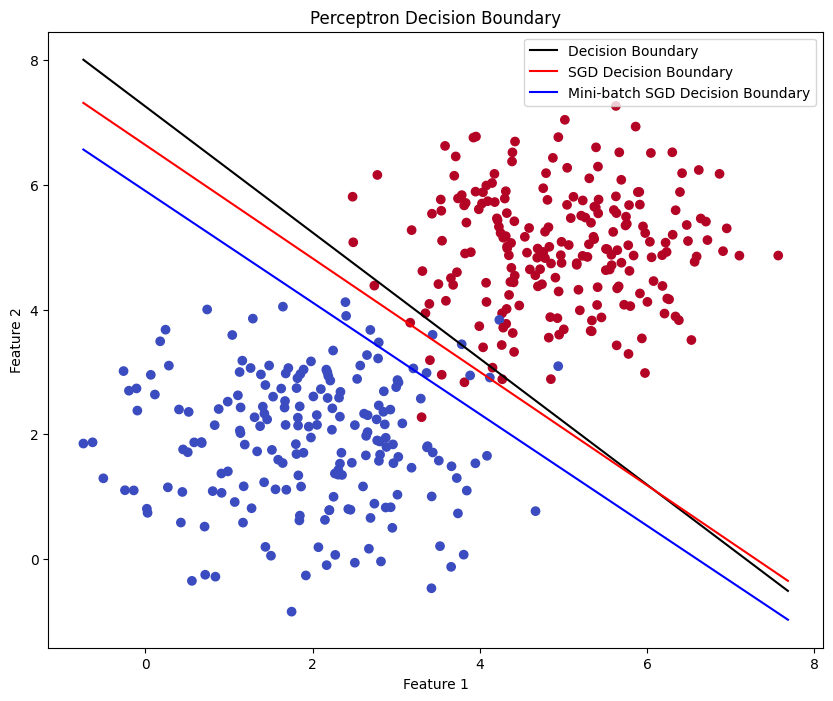

In [3]:

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 1], X_train[:, 2], c=y_train, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


my_perceptron = Perceptron(learning_rate=0.01, epochs=1000)


# Normal perceptron
start_time = time.time()
w = my_perceptron.train(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

# Plotting decision boundary
x2 = -(w[0] + w[1]*x1) / w[2]
plt.plot(x1, x2, 'k-', label='Decision Boundary')
plt.title('Perceptron Decision Boundary')


y_pred = np.array([my_perceptron.predict(xi) for xi in X_test])
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# SGD Perceptron

start_time = time.time()
w = my_perceptron.train_sgd(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")


x2 = -(w[0] + w[1]*x1) / w[2]
plt.plot(x1, x2, 'r-', label='SGD Decision Boundary')

# Evaluate accuracy
y_pred = np.array([my_perceptron.predict(xi) for xi in X_test])
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy SGD: {accuracy:.2f}")


# Mini-batch SGD Perceptron

start_time = time.time()
w = my_perceptron.train_mini_batch_sgd(X_train, y_train, batch_size=32)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

x2 = -(w[0] + w[1]*x1) / w[2]
plt.plot(x1, x2, 'b-', label='Mini-batch SGD Decision Boundary')

# Evaluate accuracy
y_pred = np.array([my_perceptron.predict(xi) for xi in X_test])
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Mini-batch SGD: {accuracy:.2f}")

plt.legend()
plt.show()



Training time: 0.00 seconds
Accuracy: 0.93
[-5.11955533  0.7759431   0.86734498]
[-42.           6.97731178  12.55829781]


Text(0.5, 1.0, 'Perceptron Decision Boundary')

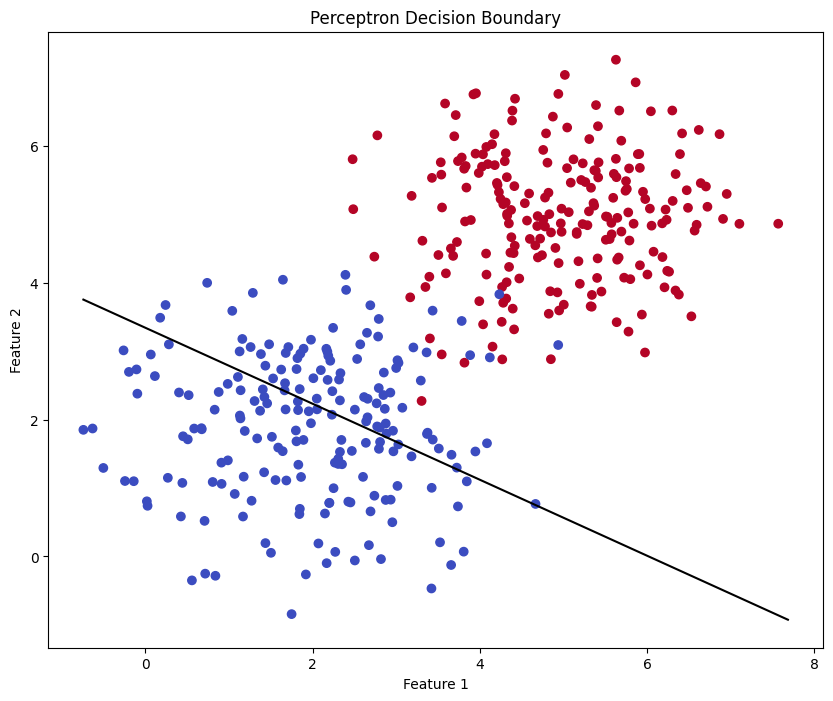

In [4]:
from sklearn.linear_model import Perceptron as skPerceptron

sk_perceptron = skPerceptron(max_iter=10000, tol=0.01)

start_time = time.time()
sk_perceptron.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

y_pred = sk_perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(w)
w = sk_perceptron.coef_[0]
print(w)
x1 = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
x2 = -(w[0] + w[1]*x1) / w[2] 

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 1], X_train[:, 2], c=y_train, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.plot(x1, x2, 'k-', label='Decision Boundary')
plt.title('Perceptron Decision Boundary')

